In [1]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
sys.path.append('/Users/iwatobipen/develop/chemoenv/psikit/psikit/')

In [2]:
from psikit import Psikit

In [3]:
pk=Psikit(debug=True,threads=1,memory=12)


  Memory set to  11.176 GiB by Python driver.
  Threads set to 1 by Python driver.


In [4]:
pk.read_from_smiles('N1C=NC2=C1C(=O)N(C(=O)N2C)C')

In [5]:
pk.optimize()

Optimizer: Optimization complete!


-637.322892578158

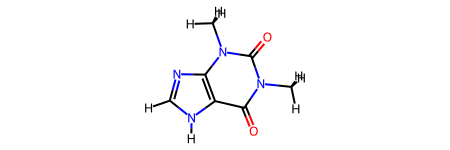

In [6]:
pk.mol

In [7]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.25221591  0.14314602 -0.47706976  0.24159404 -0.07059497  0.34088739
 -0.48585951 -0.05151978  0.39204147 -0.52607688 -0.05813855 -0.01576546
 -0.0511517   0.32839575  0.16463754  0.05890331  0.05890331  0.05890331
  0.06699347  0.06699347  0.06699347]
[-0.69630106  0.3817532  -0.60826335  0.63844658  0.07111562  0.89296122
 -0.62290204 -0.87788597  1.0965967  -0.62546802 -0.87773631 -0.12081217
 -0.12389726  0.34622066  0.19048024  0.15086665  0.14934991  0.16682543
  0.14623     0.17563082  0.14678916]
[-0.1191943   0.0927998  -0.27076428  0.14281026 -0.11265132  0.29716343
 -0.39138072 -0.18387439  0.33331338 -0.39172299 -0.14924872 -0.13673012
 -0.14323013  0.22525213  0.12822556  0.10812742  0.10721538  0.12475533
  0.10604109  0.12701179  0.1060814 ]


In [8]:
mol = pk.mol
atoms = mol.GetAtoms()

In [9]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [10]:
df = pd.DataFrame(data)

In [11]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,N,-0.252,-0.696,-0.119
1,C,0.143,0.382,0.093
2,N,-0.477,-0.608,-0.271
3,C,0.242,0.638,0.143
4,C,-0.071,0.071,-0.113
5,C,0.341,0.893,0.297
6,O,-0.486,-0.623,-0.391
7,N,-0.052,-0.878,-0.184
8,C,0.392,1.097,0.333
9,O,-0.526,-0.625,-0.392


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
plt.style.use('ggplot')

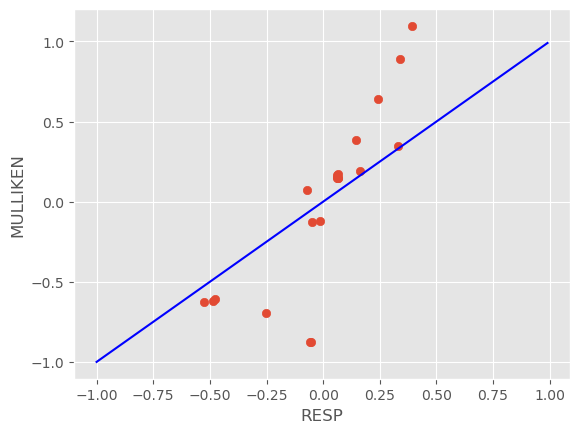

In [14]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

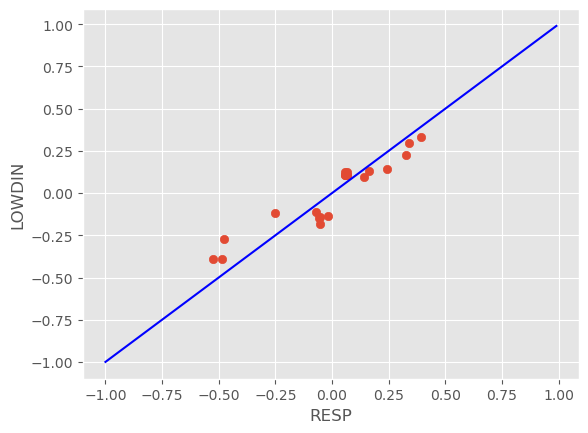

In [15]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

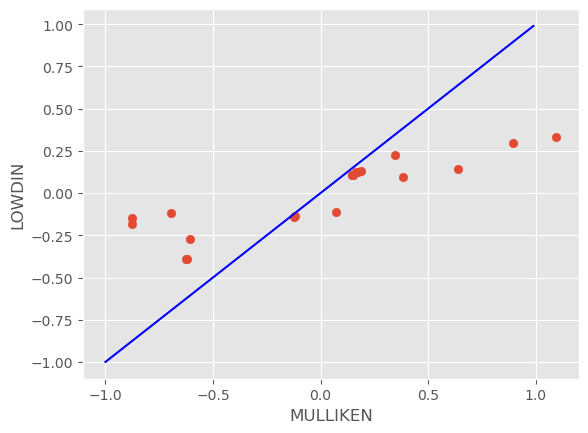

In [16]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')